# ADS Exercise

Importing packages

In [1]:
import numpy as np
import pandas as pd

Reading file

** Read CSV Customer_Sales_Transactional_Data_CSV ** <br>
** Copy data into df variable ** <br>
** Display the shape of the Dataframe ** <br>
** Display top 5 rows of the Dataframe **

In [2]:
#Write Your Code Here
data = pd.read_csv('Customer_Sales_Transactional_Data_CSV.txt')

In [3]:
#Write Your Code Here
df = data.copy()

In [4]:
#Write Your Code Here
df.shape

(1058198, 3)

In [5]:
#Write Your Code Here
df.head()

,SALES_dATE,CUSTOMER_ID,SALES_AMOUNT
0,10/18/2014,34810920,205.44
1,9/22/2014,1026037818,51.36
2,9/30/2014,1095693062,222.56
3,10/25/2014,15142688,171.20
4,10/18/2014,1022245368,171.20


** Rename SALES_dATE to SALES_DATE** <br>
** Convert SALES_DATE to datetime format ** <br>
** Show dataframe information using info method ** <br>
** Show top 5 rows of the dataframe **

In [6]:
#Write Your Code Here
df.rename(columns={'SALES_dATE':'SALES_DATE'}, inplace=True)

In [7]:
#Write Your Code Here
df['SALES_DATE'] = pd.to_datetime(df['SALES_DATE'])

In [8]:
#Write Your Code Here
df.dtypes

SALES_DATE      datetime64[ns]
CUSTOMER_ID              int64
SALES_AMOUNT           float64
dtype: object

In [9]:
#Write Your Code Here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058198 entries, 0 to 1058197
Data columns (total 3 columns):
SALES_DATE      1058198 non-null datetime64[ns]
CUSTOMER_ID     1058198 non-null int64
SALES_AMOUNT    1058198 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 24.2 MB


In [10]:
#Write Your Code Here
df.head()

,SALES_DATE,CUSTOMER_ID,SALES_AMOUNT
0,2014-10-18,34810920,205.44
1,2014-09-22,1026037818,51.36
2,2014-09-30,1095693062,222.56
3,2014-10-25,15142688,171.20
4,2014-10-18,1022245368,171.20


Calculating weeks

**Check Week Number of the year from SALES_DATE column ** <br>
**Apply some logic to convert week number 38-43 into 0-5, 0 week will be the last week from 2014-10-20 to 2014-10-26 **

In [11]:
#Write Your Code Here
#df['SALES_WEEK'] = pd.DateTimeIndex(df[SALES_DATE]).week
df.SALES_DATE.dt.week.unique()

array([42, 39, 40, 43, 41, 38], dtype=int64)

In [12]:
#Write Your Code Here
df['SALES_WEEK'] = df.SALES_DATE.dt.week
df.head()

,SALES_DATE,CUSTOMER_ID,SALES_AMOUNT,SALES_WEEK
0,2014-10-18,34810920,205.44,42
1,2014-09-22,1026037818,51.36,39
2,2014-09-30,1095693062,222.56,40
3,2014-10-25,15142688,171.20,43
4,2014-10-18,1022245368,171.20,42


Converting Weeks to 5, 4, 3, 2, 1, and 0 format

In [13]:
#Write Your Code Here
#df['SALES_WEEK'] = abs((df['SALES_WEEK'] %9)-7)
data = [df]
for week_num in data:
    week_num.loc[ week_num['SALES_WEEK'] == 43, 'SALES_WEEK']=0,
    week_num.loc[ week_num['SALES_WEEK'] == 42, 'SALES_WEEK']=1,
    week_num.loc[ week_num['SALES_WEEK'] == 41, 'SALES_WEEK']=2,
    week_num.loc[ week_num['SALES_WEEK'] == 40, 'SALES_WEEK']=3,
    week_num.loc[ week_num['SALES_WEEK'] == 39, 'SALES_WEEK']=4,
    week_num.loc[ week_num['SALES_WEEK'] == 38, 'SALES_WEEK']=5,

In [14]:
df.head()

,SALES_DATE,CUSTOMER_ID,SALES_AMOUNT,SALES_WEEK
0,2014-10-18,34810920,205.44,1
1,2014-09-22,1026037818,51.36,4
2,2014-09-30,1095693062,222.56,3
3,2014-10-25,15142688,171.20,0
4,2014-10-18,1022245368,171.20,1


In [15]:
df.SALES_WEEK.unique()

array([1, 4, 3, 0, 2, 5], dtype=int64)

**Group By dataframe on 'CUSTOMER_ID' and 'SALES_WEEK' and find the following feature **

We need to create following features for each customer on each week:

* Historic_Visits
* Historic_Sales
* STD_SALESAMOUNT
* VARIATION_SALESAMOUNT
* MAX_SALESAMOUNT
* MIN_SALESAMOUNT

**Save result in variable weeks ** <br>
Note: In this project we will be creating Churn feature from Week-0

In [16]:
New_df = df.groupby(['CUSTOMER_ID', 'SALES_WEEK'])
Weeks = New_df.agg({'SALES_AMOUNT':{'Historic_Visits':'count','Historic_Sales':np.sum,'VARIATION_SALESAMOUNT':np.var, 'STD_SALESAMOUNT':np.std, 'MAX_SALESAMOUNT':np.max,'MIN_SALESAMOUNT': np.min }})
Weeks.head()

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


SALES_AMOUNT                                       \
                       Historic_Visits Historic_Sales VARIATION_SALESAMOUNT   
CUSTOMER_ID SALES_WEEK                                                        
488         3                        1         171.20                   NaN   
5194        2                        1         599.20                   NaN   
5398        0                        1          51.36                   NaN   
            2                        1          51.36                   NaN   
            4                        1          51.36                   NaN   

                                                                        
                       STD_SALESAMOUNT MAX_SALESAMOUNT MIN_SALESAMOUNT  
CUSTOMER_ID SALES_WEEK                                                  
488         3                      NaN          171.20          171.20  
5194        2                      NaN          599.20          599.20  
5398        0                      NaN           51.36           51.36  
            2                      NaN           51.36           51.36  
            4                      NaN           51.36           51.36

**Check weeks columns and drop level 0** <br>
**Rename columns name to ['CUSTOMER_ID', 'WEEK', 'HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT', 'VARIATION_SALESAMOUNT', 'MIN_SALESAMOUNT', 'MAX_SALESAMOUNT']** <br>
**Validate Columns name and shape of df, it must be (656838,8)**    

In [17]:
#Write Your Code Here
Weeks.columns = Weeks.columns.droplevel(0)

In [18]:
#Write Your Code Here
Weeks = Weeks.reset_index()

In [19]:
#Write Your Code Here
Weeks.rename(columns={'CUSTOMER_ID':'CUSTOMER_ID','SALES_WEEK':'WEEK', 'Historic_Visits':'HISTORIC_VISITS','Historic_Sales':'HISTORIC_SALES','STD_SALESAMOUNT':'STD_SALESAMOUNT','VARIATION_SALESAMOUNT':'VARIATION_SALESAMOUNT','MAX_SALESAMOUNT':'MAX_SALESAMOUNT','MIN_SALESAMOUNT':'MIN_SALESAMOUNT'}, inplace=True)

In [20]:
#Write Your Code Here
Weeks.head()

,CUSTOMER_ID,WEEK,HISTORIC_VISITS,HISTORIC_SALES,VARIATION_SALESAMOUNT,STD_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT
0,488,3,1,171.20,NaN,NaN,171.20,171.20
1,5194,2,1,599.20,NaN,NaN,599.20,599.20
2,5398,0,1,51.36,NaN,NaN,51.36,51.36
3,5398,2,1,51.36,NaN,NaN,51.36,51.36
4,5398,4,1,51.36,NaN,NaN,51.36,51.36


In [21]:
#Write Your Code Here
Weeks.shape

(656838, 8)

**Pivot weeks variable on CUSTOMER_ID ** <br>
**So your output columns look like this ** 
<img src="files/hint.PNG" >

In [22]:
#Write Your Code Here

#(new,index='InvestmentType', columns='CityLocation', values='AmountInUSD',aggfunc='sum',fill_value=0)
Weeks = pd.pivot_table( Weeks, index='CUSTOMER_ID', columns='WEEK')

In [23]:
#Write Your Code Here
Weeks.head()

HISTORIC_SALES                                        \
WEEK                     0       1       2      3       4      5   
CUSTOMER_ID                                                        
488                    NaN     NaN     NaN  171.2     NaN    NaN   
5194                   NaN     NaN  599.20    NaN     NaN    NaN   
5398                 51.36     NaN   51.36    NaN   51.36    NaN   
6930                256.80   85.60  256.80   85.6  171.20    NaN   
7260                256.80  582.08  445.12  513.6  256.80  171.2   

            HISTORIC_VISITS                ... STD_SALESAMOUNT        \
WEEK                      0    1    2    3 ...               2     3   
CUSTOMER_ID                                ...                         
488                     NaN  NaN  NaN  1.0 ...             NaN   NaN   
5194                    NaN  NaN  1.0  NaN ...             NaN   NaN   
5398                    1.0  NaN  1.0  NaN ...             NaN   NaN   
6930                    3.0  1.0  2.0  1.0 ...       60.528340   NaN   
7260                    2.0  4.0  3.0  4.0 ...       19.768473  85.6   

                          VARIATION_SALESAMOUNT                          \
WEEK                4   5                     0          1            2   
CUSTOMER_ID                                                               
488               NaN NaN                   NaN        NaN          NaN   
5194              NaN NaN                   NaN        NaN          NaN   
5398              NaN NaN                   NaN        NaN          NaN   
6930          0.00000 NaN                  0.00        NaN  3663.680000   
7260         60.52834 NaN               3663.68  2637.8496   390.792533   

                                   
WEEK               3        4   5  
CUSTOMER_ID                        
488              NaN      NaN NaN  
5194             NaN      NaN NaN  
5398             NaN      NaN NaN  
6930             NaN     0.00 NaN  
7260         7327.36  3663.68 NaN  

[5 rows x 36 columns]

In [24]:
#Write Your Code Here
Weeks.columns

MultiIndex(levels=[['HISTORIC_SALES', 'HISTORIC_VISITS', 'MAX_SALESAMOUNT', 'MIN_SALESAMOUNT', 'STD_SALESAMOUNT', 'VARIATION_SALESAMOUNT'], [0, 1, 2, 3, 4, 5]],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]],
           names=[None, 'WEEK'])

**Check weeks columns and drop all level from columns name and validate if all level are dropped or not**
**then assign weeks columns to this list ['W0_HISTORIC_VISITS', 'W1_HISTORIC_VISITS', 'W2_HISTORIC_VISITS', 'W3_HISTORIC_VISITS', 'W4_HISTORIC_VISITS', 'W5_HISTORIC_VISITS', 'W0_HISTORIC_SALES', 'W1_HISTORIC_SALES', 'W2_HISTORIC_SALES', 'W3_HISTORIC_SALES', 'W4_HISTORIC_SALES', 'W5_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W1_STD_SALESAMOUNT', 'W2_STD_SALESAMOUNT', 'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT', 'W5_STD_SALESAMOUNT', 'W0_VARIATION_SALES_AMOUNT', 'W1_VARIATION_SALES_AMOUNT', 'W2_VARIATION_SALES_AMOUNT', 'W3_VARIATION_SALES_AMOUNT', 'W4_VARIATION_SALES_AMOUNT', 'W5_VARIATION_SALES_AMOUNT', 'W0_MIN_SALESAMOUNT', 'W1_MIN_SALESAMOUNT', 'W2_MIN_SALESAMOUNT', 'W3_MIN_SALESAMOUNT', 'W4_MIN_SALESAMOUNT', 'W5_MIN_SALESAMOUNT', 'W0_MAX_SALESAMOUNT', 'W1_MAX_SALESAMOUNT', 'W2_MAX_SALESAMOUNT', 'W3_MAX_SALESAMOUNT', 'W4_MAX_SALESAMOUNT', 'W5_MAX_SALESAMOUNT']  ** 

In [25]:
#Write your code here
Weeks.columns = Weeks.columns.droplevel()

In [26]:
#Write your code here
Weeks.head()

WEEK,0,1,2,3,4,5,0,1,2,3,...,2,3,4,5,0,1,2,3,4,5
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
488,NaN,NaN,NaN,171.2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5194,NaN,NaN,599.20,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5398,51.36,NaN,51.36,NaN,51.36,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6930,256.80,85.60,256.80,85.6,171.20,NaN,3.0,1.0,2.0,1.0,...,60.528340,NaN,0.00000,NaN,0.00,NaN,3663.680000,NaN,0.00,NaN
7260,256.80,582.08,445.12,513.6,256.80,171.2,2.0,4.0,3.0,4.0,...,19.768473,85.6,60.52834,NaN,3663.68,2637.8496,390.792533,7327.36,3663.68,NaN


In [27]:
#Write your code here
Weeks.columns=['W0_HISTORIC_VISITS', 'W1_HISTORIC_VISITS', 'W2_HISTORIC_VISITS', 'W3_HISTORIC_VISITS', 'W4_HISTORIC_VISITS', 'W5_HISTORIC_VISITS', 'W0_HISTORIC_SALES', 'W1_HISTORIC_SALES', 'W2_HISTORIC_SALES', 'W3_HISTORIC_SALES', 'W4_HISTORIC_SALES', 'W5_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W1_STD_SALESAMOUNT', 'W2_STD_SALESAMOUNT', 'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT', 'W5_STD_SALESAMOUNT', 'W0_VARIATION_SALES_AMOUNT', 'W1_VARIATION_SALES_AMOUNT', 'W2_VARIATION_SALES_AMOUNT', 'W3_VARIATION_SALES_AMOUNT', 'W4_VARIATION_SALES_AMOUNT', 'W5_VARIATION_SALES_AMOUNT', 'W0_MIN_SALESAMOUNT', 'W1_MIN_SALESAMOUNT', 'W2_MIN_SALESAMOUNT', 'W3_MIN_SALESAMOUNT', 'W4_MIN_SALESAMOUNT', 'W5_MIN_SALESAMOUNT', 'W0_MAX_SALESAMOUNT', 'W1_MAX_SALESAMOUNT', 'W2_MAX_SALESAMOUNT', 'W3_MAX_SALESAMOUNT', 'W4_MAX_SALESAMOUNT', 'W5_MAX_SALESAMOUNT']

In [28]:
#Write your code here
Weeks.head()

,W0_HISTORIC_VISITS,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,W5_HISTORIC_VISITS,W0_HISTORIC_SALES,W1_HISTORIC_SALES,W2_HISTORIC_SALES,W3_HISTORIC_SALES,...,W2_MIN_SALESAMOUNT,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
488,NaN,NaN,NaN,171.2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5194,NaN,NaN,599.20,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5398,51.36,NaN,51.36,NaN,51.36,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6930,256.80,85.60,256.80,85.6,171.20,NaN,3.0,1.0,2.0,1.0,...,60.528340,NaN,0.00000,NaN,0.00,NaN,3663.680000,NaN,0.00,NaN
7260,256.80,582.08,445.12,513.6,256.80,171.2,2.0,4.0,3.0,4.0,...,19.768473,85.6,60.52834,NaN,3663.68,2637.8496,390.792533,7327.36,3663.68,NaN


In [29]:
#Write your code here
Weeks.columns

Index(['W0_HISTORIC_VISITS', 'W1_HISTORIC_VISITS', 'W2_HISTORIC_VISITS',
       'W3_HISTORIC_VISITS', 'W4_HISTORIC_VISITS', 'W5_HISTORIC_VISITS',
       'W0_HISTORIC_SALES', 'W1_HISTORIC_SALES', 'W2_HISTORIC_SALES',
       'W3_HISTORIC_SALES', 'W4_HISTORIC_SALES', 'W5_HISTORIC_SALES',
       'W0_STD_SALESAMOUNT', 'W1_STD_SALESAMOUNT', 'W2_STD_SALESAMOUNT',
       'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT', 'W5_STD_SALESAMOUNT',
       'W0_VARIATION_SALES_AMOUNT', 'W1_VARIATION_SALES_AMOUNT',
       'W2_VARIATION_SALES_AMOUNT', 'W3_VARIATION_SALES_AMOUNT',
       'W4_VARIATION_SALES_AMOUNT', 'W5_VARIATION_SALES_AMOUNT',
       'W0_MIN_SALESAMOUNT', 'W1_MIN_SALESAMOUNT', 'W2_MIN_SALESAMOUNT',
       'W3_MIN_SALESAMOUNT', 'W4_MIN_SALESAMOUNT', 'W5_MIN_SALESAMOUNT',
       'W0_MAX_SALESAMOUNT', 'W1_MAX_SALESAMOUNT', 'W2_MAX_SALESAMOUNT',
       'W3_MAX_SALESAMOUNT', 'W4_MAX_SALESAMOUNT', 'W5_MAX_SALESAMOUNT'],
      dtype='object')

In addition to each week feature, we also need below overall features against each customer and store in variable overall_detail:

* Historic_Visits
* Historic_Sales
* STD_SALESAMOUNT
* VARIATION_SALESAMOUNT
* MAX_SALESAMOUNT
* MIN_SALESAMOUNT
* FIRST_VISIT
* LAST_VISIT

Note: These features will be calculated on Week-5 to Week-1, we will not include Week-0 as we are deriving CHURN feature from it

**Hint: use df[df['SALES_WEEK'] > 0].groupby() **

In [30]:
#Write your code here
Overall_detail = df[df['SALES_WEEK']>0].groupby('CUSTOMER_ID').agg({'SALES_AMOUNT':{'HISTORIC_VISITS':'count','HISTORIC_SALES':np.sum,'STD_SALESAMOUNT':np.std,'VARIATION_SALESAMOUNT':np.var, 'MAX_SALESAMOUNT':np.max, 'MIN_SALESAMOUNT': np.min },'SALES_DATE':{'LAST_VISIT': 'max', 'FIRST_VISIT': 'min'}})

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


** Display top 5 rows of the overall_detail **

In [31]:
#Write your code here
Overall_detail.head()

SALES_AMOUNT                                 \
            HISTORIC_VISITS HISTORIC_SALES STD_SALESAMOUNT   
CUSTOMER_ID                                                  
488                       1         171.20             NaN   
5194                      1         599.20             NaN   
5398                      2         102.72        0.000000   
6930                      6         599.20       34.946054   
7260                     14        1968.80       52.950181   

                                                                  SALES_DATE  \
            VARIATION_SALESAMOUNT MAX_SALESAMOUNT MIN_SALESAMOUNT LAST_VISIT   
CUSTOMER_ID                                                                    
488                           NaN          171.20          171.20 2014-10-03   
5194                          NaN          599.20          599.20 2014-10-09   
5398                     0.000000           51.36           51.36 2014-10-07   
6930                  1221.226667          171.20           85.60 2014-10-15   
7260                  2803.721705          256.80           68.48 2014-10-19   

                         
            FIRST_VISIT  
CUSTOMER_ID              
488          2014-10-03  
5194         2014-10-09  
5398         2014-09-23  
6930         2014-09-25  
7260         2014-09-19

**Check overall_detail columns and drop all level and validate only following columns must be their ** <br>
<br>
'HISTORIC_VISITS'
'HISTORIC_SALES'
'STD_SALESAMOUNT'
'VARIATION_SALESAMOUNT'
'MAX_SALESAMOUNT' 
'MIN_SALESAMOUNT'
'LAST_VISIT'
'FIRST_VISIT'

In [32]:
#Write your code here
Overall_detail.columns = Overall_detail.columns.droplevel()

In [33]:
#Write your code here
Overall_detail.head()

,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT
CUSTOMER_ID,,,,,,,,
488,1,171.20,NaN,NaN,171.20,171.20,2014-10-03,2014-10-03
5194,1,599.20,NaN,NaN,599.20,599.20,2014-10-09,2014-10-09
5398,2,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23
6930,6,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25
7260,14,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19


**Now reset index of overall_detail variable **

In [34]:
#Write your code here
Overall_detail.reset_index(inplace=True)

** Display top 5 rows of the overall_detail variable ** 

In [35]:
#Write your code here
Overall_detail.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT
0,488,1,171.20,NaN,NaN,171.20,171.20,2014-10-03,2014-10-03
1,5194,1,599.20,NaN,NaN,599.20,599.20,2014-10-09,2014-10-09
2,5398,2,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23
3,6930,6,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25
4,7260,14,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19


**Now reset index of weeks variable **

In [36]:
#Write your code here
Weeks.reset_index(inplace= True)

** Display top 5 rows of the overall_detail ** 

In [37]:
#Write your code here
Weeks.head()

,CUSTOMER_ID,W0_HISTORIC_VISITS,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,W5_HISTORIC_VISITS,W0_HISTORIC_SALES,W1_HISTORIC_SALES,W2_HISTORIC_SALES,...,W2_MIN_SALESAMOUNT,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT
0,488,NaN,NaN,NaN,171.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5194,NaN,NaN,599.20,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5398,51.36,NaN,51.36,NaN,51.36,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6930,256.80,85.60,256.80,85.6,171.20,NaN,3.0,1.0,2.0,...,60.528340,NaN,0.00000,NaN,0.00,NaN,3663.680000,NaN,0.00,NaN
4,7260,256.80,582.08,445.12,513.6,256.80,171.2,2.0,4.0,3.0,...,19.768473,85.6,60.52834,NaN,3663.68,2637.8496,390.792533,7327.36,3663.68,NaN


**Merging Overall_detail and Weeks dataframes and storing in final dataframe**

Note: Total customers should be 200,000 <br>
Find the shape of the final dataset, shape must be (200000, 45) <br>
Find the sum of all the null values in each columns

In [38]:
#Write your code here
final = Overall_detail.merge(Weeks, left_on='CUSTOMER_ID', right_on='CUSTOMER_ID', how='outer')

In [39]:
#Write your code here
final.shape

(200000, 45)

Checking missing values

In [40]:
#Write your code here
final.isnull().sum()

CUSTOMER_ID                       0
HISTORIC_VISITS                8158
HISTORIC_SALES                 8158
STD_SALESAMOUNT               53666
VARIATION_SALESAMOUNT         53666
MAX_SALESAMOUNT                8158
MIN_SALESAMOUNT                8158
LAST_VISIT                     8158
FIRST_VISIT                    8158
W0_HISTORIC_VISITS            89431
W1_HISTORIC_VISITS            88812
W2_HISTORIC_VISITS            87265
W3_HISTORIC_VISITS            79858
W4_HISTORIC_VISITS            89495
W5_HISTORIC_VISITS           108301
W0_HISTORIC_SALES             89431
W1_HISTORIC_SALES             88812
W2_HISTORIC_SALES             87265
W3_HISTORIC_SALES             79858
W4_HISTORIC_SALES             89495
W5_HISTORIC_SALES            108301
W0_STD_SALESAMOUNT            89431
W1_STD_SALESAMOUNT            88812
W2_STD_SALESAMOUNT            87265
W3_STD_SALESAMOUNT            79858
W4_STD_SALESAMOUNT            89495
W5_STD_SALESAMOUNT           108301
W0_VARIATION_SALES_AMOUNT   

**Deal with missing values of FIRST_VISIT and LAST_VISIT **

Dealing with dates missing values in FIRST_VISIT and LAST_VISIT.

Note: we are observing these missing values becuase 8158 customers didn't come to store from Week-5 to Week-1, they only came in Week-0, so replace missing values with 19-Oct-2014 (The end date of Week-1)

In [41]:
from datetime import datetime
d0 = datetime(2014,10,19)

In [42]:
#Write your code here
final.loc[final['FIRST_VISIT'].isnull(),'FIRST_VISIT'] = d0

In [43]:
#Write your code here
final.loc[final['LAST_VISIT'].isnull(),'LAST_VISIT'] = d0

**validate that missing values of FIRST_VISIT and LAST_VISIT is now zero **

In [44]:
#Write your code here
final.isnull().sum()

CUSTOMER_ID                       0
HISTORIC_VISITS                8158
HISTORIC_SALES                 8158
STD_SALESAMOUNT               53666
VARIATION_SALESAMOUNT         53666
MAX_SALESAMOUNT                8158
MIN_SALESAMOUNT                8158
LAST_VISIT                        0
FIRST_VISIT                       0
W0_HISTORIC_VISITS            89431
W1_HISTORIC_VISITS            88812
W2_HISTORIC_VISITS            87265
W3_HISTORIC_VISITS            79858
W4_HISTORIC_VISITS            89495
W5_HISTORIC_VISITS           108301
W0_HISTORIC_SALES             89431
W1_HISTORIC_SALES             88812
W2_HISTORIC_SALES             87265
W3_HISTORIC_SALES             79858
W4_HISTORIC_SALES             89495
W5_HISTORIC_SALES            108301
W0_STD_SALESAMOUNT            89431
W1_STD_SALESAMOUNT            88812
W2_STD_SALESAMOUNT            87265
W3_STD_SALESAMOUNT            79858
W4_STD_SALESAMOUNT            89495
W5_STD_SALESAMOUNT           108301
W0_VARIATION_SALES_AMOUNT   

In remaining columns, we are observing missing values beacause customer did not purchase anything from Store, so technically Sales was ZERO. Hence replace remaining missing values with ZERO

In [45]:
#Write your code here
final.fillna(0, inplace=True)

In [46]:
final.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT,W0_HISTORIC_VISITS,...,W2_MIN_SALESAMOUNT,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT
0,488,1.0,171.20,0.000000,0.000000,171.20,171.20,2014-10-03,2014-10-03,0.00,...,0.000000,0.0,0.00000,0.0,0.00,0.0000,0.000000,0.00,0.00,0.0
1,5194,1.0,599.20,0.000000,0.000000,599.20,599.20,2014-10-09,2014-10-09,0.00,...,0.000000,0.0,0.00000,0.0,0.00,0.0000,0.000000,0.00,0.00,0.0
2,5398,2.0,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23,51.36,...,0.000000,0.0,0.00000,0.0,0.00,0.0000,0.000000,0.00,0.00,0.0
3,6930,6.0,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25,256.80,...,60.528340,0.0,0.00000,0.0,0.00,0.0000,3663.680000,0.00,0.00,0.0
4,7260,14.0,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19,256.80,...,19.768473,85.6,60.52834,0.0,3663.68,2637.8496,390.792533,7327.36,3663.68,0.0


**validate that missing values of all the other columns is now zero **

In [47]:
#Write your code here
final.isnull().sum()

CUSTOMER_ID                  0
HISTORIC_VISITS              0
HISTORIC_SALES               0
STD_SALESAMOUNT              0
VARIATION_SALESAMOUNT        0
MAX_SALESAMOUNT              0
MIN_SALESAMOUNT              0
LAST_VISIT                   0
FIRST_VISIT                  0
W0_HISTORIC_VISITS           0
W1_HISTORIC_VISITS           0
W2_HISTORIC_VISITS           0
W3_HISTORIC_VISITS           0
W4_HISTORIC_VISITS           0
W5_HISTORIC_VISITS           0
W0_HISTORIC_SALES            0
W1_HISTORIC_SALES            0
W2_HISTORIC_SALES            0
W3_HISTORIC_SALES            0
W4_HISTORIC_SALES            0
W5_HISTORIC_SALES            0
W0_STD_SALESAMOUNT           0
W1_STD_SALESAMOUNT           0
W2_STD_SALESAMOUNT           0
W3_STD_SALESAMOUNT           0
W4_STD_SALESAMOUNT           0
W5_STD_SALESAMOUNT           0
W0_VARIATION_SALES_AMOUNT    0
W1_VARIATION_SALES_AMOUNT    0
W2_VARIATION_SALES_AMOUNT    0
W3_VARIATION_SALES_AMOUNT    0
W4_VARIATION_SALES_AMOUNT    0
W5_VARIA

**Create CHURN column from Week-0**
**For This <br>
*Create a function that takes W0_HISTORIC_SALES as a parameter, and if W0_HISTORIC_SALES > 0 return false else return true*
**

In [48]:
#Write your code here
final[['W0_HISTORIC_VISITS', 'W0_HISTORIC_SALES','W0_STD_SALESAMOUNT','W0_VARIATION_SALES_AMOUNT','W0_MIN_SALESAMOUNT','W0_MAX_SALESAMOUNT']].head()


,W0_HISTORIC_VISITS,W0_HISTORIC_SALES,W0_STD_SALESAMOUNT,W0_VARIATION_SALES_AMOUNT,W0_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT
0,0.00,0.0,0.00,0.00,0.00000,0.00
1,0.00,0.0,0.00,0.00,0.00000,0.00
2,51.36,1.0,51.36,51.36,0.00000,0.00
3,256.80,3.0,85.60,85.60,0.00000,0.00
4,256.80,2.0,171.20,85.60,60.52834,3663.68


In [49]:
#Write your code here
def Get_Churn_Value(feature):
    if feature>0:
        return 1
    else:
        return 0

In [50]:
#Write your code here
final['CHURN'] = 0

In [51]:
#Write your code here
final.loc[:, ('CHURN')] = final['W0_HISTORIC_SALES'].apply(Get_Churn_Value)

In [52]:
#Write your code here
final.columns

Index(['CUSTOMER_ID', 'HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VARIATION_SALESAMOUNT', 'MAX_SALESAMOUNT', 'MIN_SALESAMOUNT',
       'LAST_VISIT', 'FIRST_VISIT', 'W0_HISTORIC_VISITS', 'W1_HISTORIC_VISITS',
       'W2_HISTORIC_VISITS', 'W3_HISTORIC_VISITS', 'W4_HISTORIC_VISITS',
       'W5_HISTORIC_VISITS', 'W0_HISTORIC_SALES', 'W1_HISTORIC_SALES',
       'W2_HISTORIC_SALES', 'W3_HISTORIC_SALES', 'W4_HISTORIC_SALES',
       'W5_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W1_STD_SALESAMOUNT',
       'W2_STD_SALESAMOUNT', 'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT',
       'W5_STD_SALESAMOUNT', 'W0_VARIATION_SALES_AMOUNT',
       'W1_VARIATION_SALES_AMOUNT', 'W2_VARIATION_SALES_AMOUNT',
       'W3_VARIATION_SALES_AMOUNT', 'W4_VARIATION_SALES_AMOUNT',
       'W5_VARIATION_SALES_AMOUNT', 'W0_MIN_SALESAMOUNT', 'W1_MIN_SALESAMOUNT',
       'W2_MIN_SALESAMOUNT', 'W3_MIN_SALESAMOUNT', 'W4_MIN_SALESAMOUNT',
       'W5_MIN_SALESAMOUNT', 'W0_MAX_SALESAMOUNT', 'W1_MAX_SALESAMOUNT',

**Drop Week-0 remaining features after creating CHURN column**

In [53]:
final.shape

(200000, 46)

In [54]:
#Write your code here
final.drop(['W0_HISTORIC_VISITS', 'W0_HISTORIC_SALES','W0_STD_SALESAMOUNT','W0_VARIATION_SALES_AMOUNT','W0_MIN_SALESAMOUNT','W0_MAX_SALESAMOUNT'],axis=1, inplace=True)

**Convert FIRST_VIST and LAST_VISIT into number days like 16 days and save in new columns: FIRST_VISIT_DAY and LAST_VISIT_DAY**

In [55]:
#Write your code here
final['FIRST_VISIT_DAY'] =4444
final.loc[:,('FIRST_VISIT_DAY')]=d0 -final['FIRST_VISIT']
final['LAST_VISIT_DAY'] =4444
final.loc[:,('LAST_VISIT_DAY')]=d0 -final['LAST_VISIT']

In [56]:
#Write your code here
final.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT,W1_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,171.20,0.000000,0.000000,171.20,171.20,2014-10-03,2014-10-03,0.00,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,0,16 days,16 days
1,5194,1.0,599.20,0.000000,0.000000,599.20,599.20,2014-10-09,2014-10-09,0.00,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,0,10 days,10 days
2,5398,2.0,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23,0.00,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,1,26 days,12 days
3,6930,6.0,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25,85.60,...,0.00000,0.0,0.0000,3663.680000,0.00,0.00,0.0,1,24 days,4 days
4,7260,14.0,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19,582.08,...,60.52834,0.0,2637.8496,390.792533,7327.36,3663.68,0.0,1,30 days,0 days


**Convert FIRST_VISIT_DAY and LAST_VISIT_DAY into just number like 16 days into 16**

In [57]:
#Write your code here
final['FIRST_VISIT_DAY'] =final['FIRST_VISIT_DAY'].dt.days
final['LAST_VISIT_DAY'] =final['LAST_VISIT_DAY'].dt.days

**Show the types of final dataframe**

In [58]:
#Write your code here
final.dtypes

CUSTOMER_ID                           int64
HISTORIC_VISITS                     float64
HISTORIC_SALES                      float64
STD_SALESAMOUNT                     float64
VARIATION_SALESAMOUNT               float64
MAX_SALESAMOUNT                     float64
MIN_SALESAMOUNT                     float64
LAST_VISIT                   datetime64[ns]
FIRST_VISIT                  datetime64[ns]
W1_HISTORIC_VISITS                  float64
W2_HISTORIC_VISITS                  float64
W3_HISTORIC_VISITS                  float64
W4_HISTORIC_VISITS                  float64
W5_HISTORIC_VISITS                  float64
W1_HISTORIC_SALES                   float64
W2_HISTORIC_SALES                   float64
W3_HISTORIC_SALES                   float64
W4_HISTORIC_SALES                   float64
W5_HISTORIC_SALES                   float64
W1_STD_SALESAMOUNT                  float64
W2_STD_SALESAMOUNT                  float64
W3_STD_SALESAMOUNT                  float64
W4_STD_SALESAMOUNT              

Dropping FINAL_VISIT and LAST_VISIT after creating number of days features

In [59]:
#Write your code here
final.drop(['FIRST_VISIT', 'LAST_VISIT'], axis=1, inplace=True)

In [60]:
final.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,171.20,0.000000,0.000000,171.20,171.20,0.00,0.00,171.2,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,0,16,16
1,5194,1.0,599.20,0.000000,0.000000,599.20,599.20,0.00,599.20,0.0,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,0,10,10
2,5398,2.0,102.72,0.000000,0.000000,51.36,51.36,0.00,51.36,0.0,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,1,26,12
3,6930,6.0,599.20,34.946054,1221.226667,171.20,85.60,85.60,256.80,85.6,...,0.00000,0.0,0.0000,3663.680000,0.00,0.00,0.0,1,24,4
4,7260,14.0,1968.80,52.950181,2803.721705,256.80,68.48,582.08,445.12,513.6,...,60.52834,0.0,2637.8496,390.792533,7327.36,3663.68,0.0,1,30,0


In [61]:
#final.to_csv('Project_ADS.csv', index= False)

In [62]:
df = final.copy()

## Project EDA

In [63]:
df.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,171.20,0.000000,0.000000,171.20,171.20,0.00,0.00,171.2,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,0,16,16
1,5194,1.0,599.20,0.000000,0.000000,599.20,599.20,0.00,599.20,0.0,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,0,10,10
2,5398,2.0,102.72,0.000000,0.000000,51.36,51.36,0.00,51.36,0.0,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,1,26,12
3,6930,6.0,599.20,34.946054,1221.226667,171.20,85.60,85.60,256.80,85.6,...,0.00000,0.0,0.0000,3663.680000,0.00,0.00,0.0,1,24,4
4,7260,14.0,1968.80,52.950181,2803.721705,256.80,68.48,582.08,445.12,513.6,...,60.52834,0.0,2637.8496,390.792533,7327.36,3663.68,0.0,1,30,0


In [64]:
#Importing Libraries for visualization.....
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline


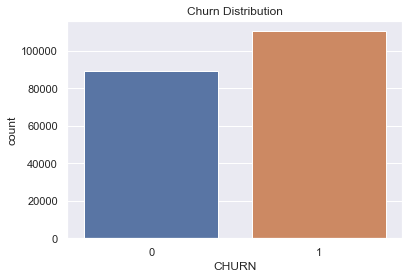

In [65]:
sns.countplot(x='CHURN', data=df);
plt.title('Churn Distribution')
plt.show()

This shows the data is balance........

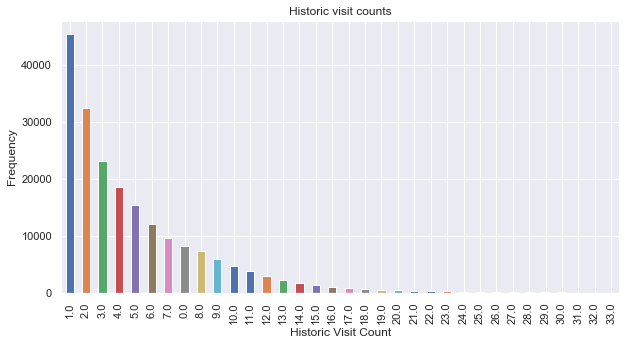

In [66]:
plt.figure(figsize=(10,5))
df.HISTORIC_VISITS.value_counts().plot(kind='Bar',title='Historic visit counts')
plt.xlabel('Historic Visit Count')
plt.ylabel('Frequency')
plt.show()

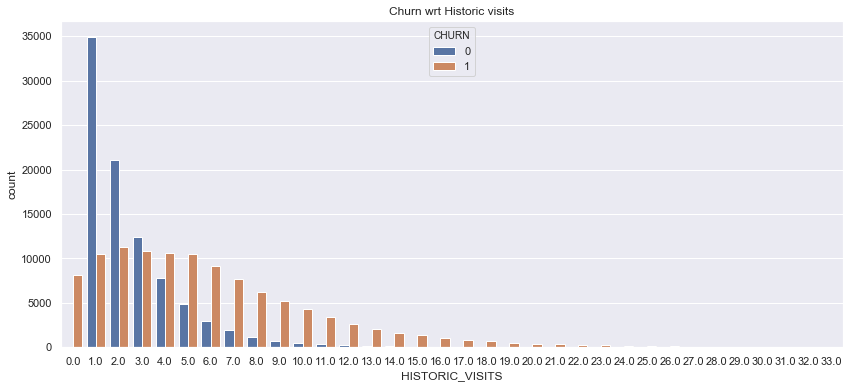

In [67]:
plt.figure(figsize=(14,6))
sns.countplot(x='HISTORIC_VISITS', data=df, hue='CHURN')
plt.title('Churn wrt Historic visits')
plt.show()

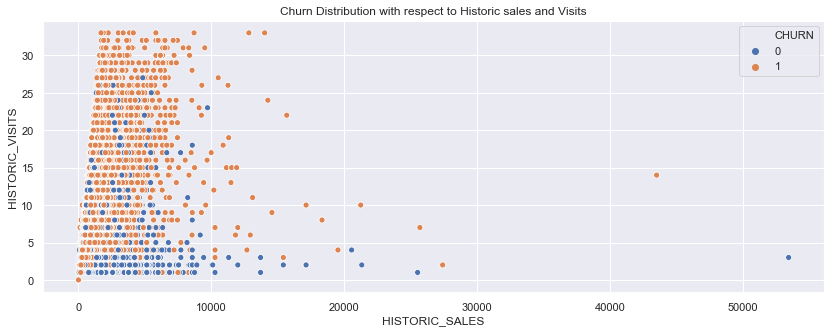

In [68]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='HISTORIC_SALES',y='HISTORIC_VISITS', hue='CHURN', data=df, sizes='HISTORIC_SALES')
plt.title('Churn Distribution with respect to Historic sales and Visits')
plt.show()

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


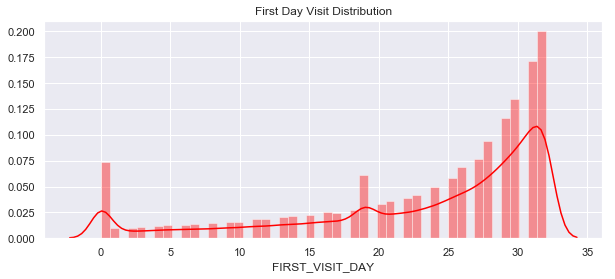

In [69]:
plt.figure(figsize=(10,4))
sns.distplot(df.FIRST_VISIT_DAY, color='red')
plt.title('First Day Visit Distribution')
plt.show()

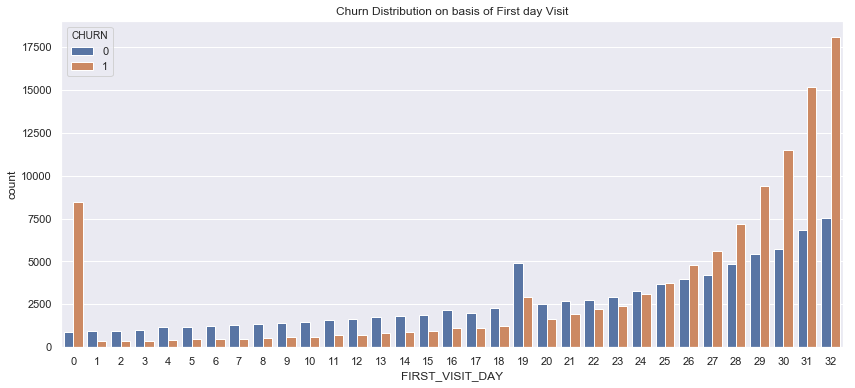

In [70]:
plt.figure(figsize=(14,6))
sns.countplot(x='FIRST_VISIT_DAY', hue='CHURN', data=df)
plt.title('Churn Distribution on basis of First day Visit')
plt.show()

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


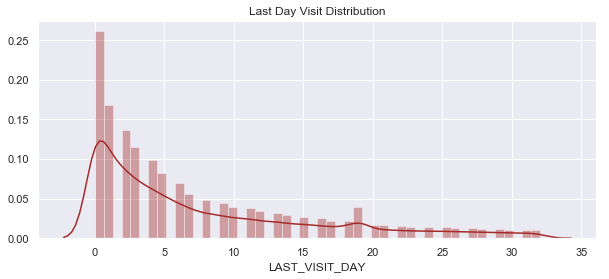

In [71]:
plt.figure(figsize=(10,4))
sns.distplot(df.LAST_VISIT_DAY, color='brown')
plt.title('Last Day Visit Distribution')
plt.show()

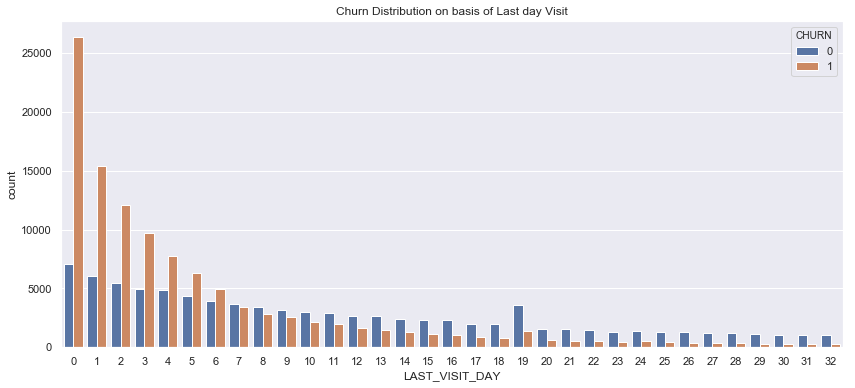

In [72]:
plt.figure(figsize=(14,6))
sns.countplot(x='LAST_VISIT_DAY', hue='CHURN', data=df)
plt.title('Churn Distribution on basis of Last day Visit')
plt.show()